#Обучение с учителем

##Задание 1

In [2]:
# Импортируем базовые бибилиотеки numpy, pandas
import numpy as np
import pandas as pd

In [3]:
# Импорт matplotlib
from matplotlib import pyplot as plt
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [4]:
# Импортируем модули из библиотеки scikit-learn
from sklearn.datasets import load_boston, load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, roc_auc_score
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import StandardScaler

In [5]:
# Загружаем тренировочный датасет и формируем датафреймы pandas
boston = load_boston()
data = boston.data
feature_names = boston.feature_names
target = boston.target
X = pd.DataFrame(data, columns=feature_names)
y = pd.DataFrame(target, columns=["price"])
print('\nИнформация о матрице признаков:')
X.info()
print('\nИнформация о целевом признаке:')
y.info()


Информация о матрице признаков:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB

Информация о целевом признаке:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   506 non-null    float64
dty

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
print(boston["DESCR"])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [38]:
# Разделям датасеты на обучающие и тестовые
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [39]:
# Строим модель регрессии 
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [41]:
# Проверка точности предсказаний
# Формируем датасет для проверки
check_test_lr = pd.DataFrame({
    "y_test": y_test["price"],
    "y_pred": y_pred.flatten(),
})
check_test_lr["error"] = (check_test_lr["y_pred"] - check_test_lr["y_test"])**2
print(check_test_lr["error"].mean())

21.517444231176903


In [42]:
# Расчитываем коэффициент детерминации
r2_lr = r2_score(check_test_lr["y_pred"], check_test_lr["y_test"])
print(f'Коэффициент детерминации R2: {r2_lr:.2f}')

Коэффициент детерминации R2: 0.67


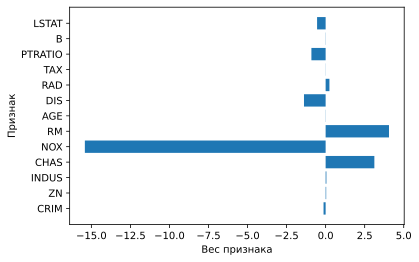

In [43]:
# Визуально оценим, какой коэффициент имеет наибольший вклад
plt.barh(feature_names, lr.coef_.flatten())
plt.xlabel("Вес признака")
plt.ylabel("Признак")
plt.show()

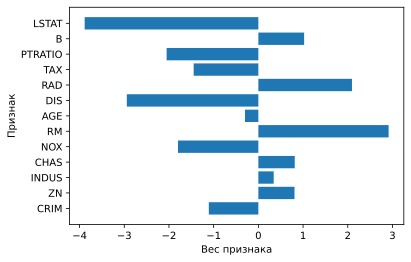

In [44]:
#проведем стандартизацию признаков, чтобы трезво оценить веса
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)
X_test_scaled = scaler.fit_transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)

#Обучим модель заново
lr.fit(X_train_scaled, y_train)

y_pred = lr.predict(X_test_scaled)

# Визуально оценим, какой коэффициент теперь имеет наибольший вклад
plt.barh(feature_names, lr.coef_.flatten())
plt.xlabel("Вес признака")
plt.ylabel("Признак")
plt.show()

In [45]:
check_test_lr = pd.DataFrame({
    "y_test": y_test["price"],
    "y_pred": y_pred.flatten(),
})

In [46]:
# Расчитываем коэффициент детерминации
r2_lr = r2_score(check_test_lr["y_pred"], check_test_lr["y_test"])
print(f'Коэффициент детерминации R2: {r2_lr:.2f}')

Коэффициент детерминации R2: 0.65


In [47]:
check_test_lr["error"] = (check_test_lr["y_pred"] - check_test_lr["y_test"])**2
print(check_test_lr["error"].mean())

24.13479128906756


##Задание 2

In [48]:
# Импортируем модули из библиотеки scikit-learn
from sklearn.ensemble import RandomForestRegressor

In [49]:
# Строим модель решающих деревьев
model = RandomForestRegressor(n_estimators=1000, max_depth=12, random_state=42)

In [50]:
# Обучаем модель и используем ее
model.fit(X_train, y_train.values[:,0])
y_pred_rf = model.predict(X_test)

In [52]:
# Проверка точности предсказаний
# Формируем датасет для проверки
check_test_rf = pd.DataFrame({
    "y_test": y_test["price"],
    "y_pred": y_pred_rf.flatten(),
})
check_test_rf["error"] = (check_test_rf["y_pred"] - check_test_rf["y_test"])**2
print(check_test_rf["error"].mean())

9.334548946165201


In [53]:
# Расчитываем коэффициент детерминации
r2_rf = r2_score(check_test_rf["y_pred"], check_test_rf["y_test"])
print(f'Коэффициент детерминации R2: {r2_rf:.2f}')

Коэффициент детерминации R2: 0.85


Метод случайного леса отработал лучше - коэффициент детерминации 0,85 против 0,67 у метода линейной регрессии.

##*Задание 3

Вызовите документацию для класса RandomForestRegressor,
найдите информацию об атрибуте feature_importances_.

С помощью этого атрибута найдите сумму всех показателей важности,
установите, какие два признака показывают наибольшую важность.

In [54]:
feature_importances = pd.DataFrame(model.feature_importances_, columns = ['importance'], index=feature_names)
feature_importances = feature_importances.sort_values(by='importance', ascending=False)
sum_importance = feature_importances['importance'].sum()
print(f'Сумма всех показателей важности: {sum_importance:.2f}\n')
n=2
print(f'{n} признака с наибольшей важностью:')
print(feature_importances.head(n))

Сумма всех показателей важности: 1.00

2 признака с наибольшей важностью:
       importance
LSTAT    0.415847
RM       0.402682


##*Задание 4

In [55]:
#Импортируйте из соответствующих модулей RandomForestClassifier, GridSearchCV и train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

In [56]:
#Загрузите датасет creditcard.csv и создайте датафрейм df
from google.colab import drive
drive.mount('/content/drive')
DATASET_PATH = '/content/drive/My Drive/GB/Python_libs/6. Видеоурок 3 Supervised learning/creditcard.csv'
df = pd.read_csv(DATASET_PATH, sep=',')

Mounted at /content/drive


In [57]:
#С помощью метода value_counts с аргументом normalize=True убедитесь в том, что выборка несбалансирована 
print(f'Частота встречаемости значений каждого класса:\n{df["Class"].value_counts(normalize=True)}\n')
#Используя метод info, проверьте, все ли столбцы содержат числовые данные и нет ли в них пропусков
print(f'Информация по датасету:')
df.info()

Частота встречаемости значений каждого класса:
0    0.998273
1    0.001727
Name: Class, dtype: float64

Информация по датасету:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 

In [60]:
#Примените следующую настройку, чтобы можно было просматривать все столбцы датафрейма: pd.options.display.max_columns = 100
pd.options.display.max_columns = 100
#Просмотрите первые 10 строк датафрейма df
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [61]:
#Создайте датафрейм X из датафрейма df, исключив столбец Class
X = df.drop(['Class'], axis = 1)
#Создайте объект Series под названием y из столбца Class
y = pd.Series(data=df['Class'])
#Разбейте X и y на тренировочный и тестовый наборы данных при помощи функции train_test_split, используя аргументы: test_size=0.3, random_state=100, stratify=y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)
#У вас должны получиться объекты X_train, X_test, y_train и y_test. Просмотрите информацию о их форме
print(f'Информация по форме датасета X_train:\n{X_train.shape}')
print(f'\nИнформация по форме датасета X_test:\n{X_test.shape}')
print(f'\nИнформация по форме датасета y_train:\n{y_train.shape}')
print(f'\nИнформация по форме датасета y_test:\n{y_test.shape}')

Информация по форме датасета X_train:
(199364, 30)

Информация по форме датасета X_test:
(85443, 30)

Информация по форме датасета y_train:
(199364,)

Информация по форме датасета y_test:
(85443,)


In [62]:
#Для поиска по сетке параметров задайте такие параметры: parameters = [{'n_estimators': [10, 15], 'max_features': np.arange(3, 5), max_depth': np.arange(4, 7)}]
parameters = [{'n_estimators': [10, 15], 'max_features': np.arange(3, 5), 'max_depth': np.arange(4, 7)}]
#Создайте модель GridSearchCV со следующими аргументами: estimator=RandomForestClassifier(random_state=100), param_grid=parameters, scoring='roc_auc', cv=3
grid_model = GridSearchCV(estimator=RandomForestClassifier(random_state=100), param_grid=parameters, scoring='roc_auc', cv=3)

In [ ]:
#Обучите модель на тренировочном наборе данных
grid_model.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=100,
                                 

In [ ]:
#Просмотрите параметры лучшей модели с помощью атрибута best_params_
fitted_parameters = grid_model.best_params_
print(f'Наилучшие параметры для модели:\n{fitted_parameters}')

Наилучшие параметры для модели:
{'max_depth': 6, 'max_features': 3, 'n_estimators': 15}


In [ ]:
#Предскажите вероятности классов с помощью полученнной модели и метода predict_proba
class_probs = grid_model.predict_proba(X_test)
#Из полученного результата (массив Numpy) выберите столбец с индексом 1 (вероятность класса 1) и запишите в массив y_pred_proba
y_pred_proba = class_probs[:,1]

In [ ]:
#Из модуля sklearn.metrics импортируйте метрику roc_auc_score.
from sklearn.metrics import roc_auc_score

In [ ]:
#Вычислите AUC на тестовых данных и сравните с результатом,полученным на тренировочных данных, используя в качестве аргументов массивы y_test и y_pred_proba.
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f'Искомая метрика: {auc_score:.2f}')

Искомая метрика: 0.95


# Задание 5

In [63]:
from sklearn.datasets import load_digits
from sklearn import datasets, svm, metrics

digits = load_digits()

In [64]:
data = digits['data']
feature_names = digits['feature_names']
target = digits['target']

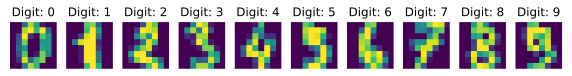

In [65]:
fig, axs = plt.subplots(nrows=1, ncols=10, figsize=(10, 10))
for i, ax, label in zip(target, axs, target):
    ax.set_axis_off()
    ax.imshow(digits.images[i])
    ax.set_title("Digit: %i" % label)

In [66]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.01)

clf = svm.SVC(gamma='auto')
clf.fit(X_train, y_train)

predict = clf.predict(X_test)

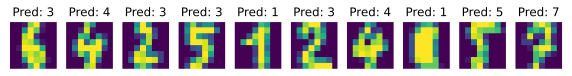

In [69]:
fig, axs = plt.subplots(nrows=1, ncols=10, figsize=(10, 10))
for ax, image, prediction in zip(axs, X_test, predict):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image)
    ax.set_title("Pred: %i" % prediction)

##*Дополнительные задания

*Дополнительные задания:

In [70]:
#1). Загрузите датасет Wine из встроенных датасетов sklearn.datasets с помощью функции load_wine в переменную data
wine = load_wine()
wine_data = wine['data']

In [71]:
#2)Просмотрите тип данных этой структуры wine и создайте список data_keys, содержащий ее ключи.
wine_data_keys = wine.keys()
print(f'Ключи датасета: {wine_data_keys}')
print(f'Тип данных структуры wine: {type(wine)}')
print(f'Тип данных структуры data: {type(data)}')

Ключи датасета: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])
Тип данных структуры wine: <class 'sklearn.utils.Bunch'>
Тип данных структуры data: <class 'numpy.ndarray'>


In [72]:
#3). Просмотрите данные, описание и названия признаков в датасете. 
#Описание нужно вывести в виде привычного, аккуратно оформленного текста, без обозначений переноса строки, но с самими переносами и т.д.
print(wine['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [73]:
#4). Сколько классов содержит целевая переменная датасета? Выведите названия классов.
class_names = set(wine["target"])
print(f'Целевая переменная содержит {len(class_names)} класса:')
for i in class_names:
  print(f'Class_{i}')

Целевая переменная содержит 3 класса:
Class_0
Class_1
Class_2


In [74]:
#5). На основе данных датасета (они содержатся в двумерном массиве Numpy) и названий признаков создайте датафрейм под названием X.
wine_X = pd.DataFrame(wine_data, columns=wine['feature_names'])
wine_X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [ ]:
#6). Выясните размер датафрейма X и установите, имеются ли в нем пропущенные значения.
print(f'Информация по датасету:')
wine_X.info()
print(f'\nРазмер датасета:{wine_X.shape}')

Информация по датасету:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-nu

In [75]:
#7). Добавьте в датафрейм поле с классами вин в виде чисел, имеющих тип данных numpy.int64. Название поля - 'target'.
wine_X['target'] = wine['target']
wine_X['target'] = wine_X['target'].astype(np.int64)
wine_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [76]:
#8). Постройте матрицу корреляций для всех полей X. Дайте полученному датафрейму название X_corr.
wine_X_corr = wine_X.corr()

In [77]:
wine_X_corr

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


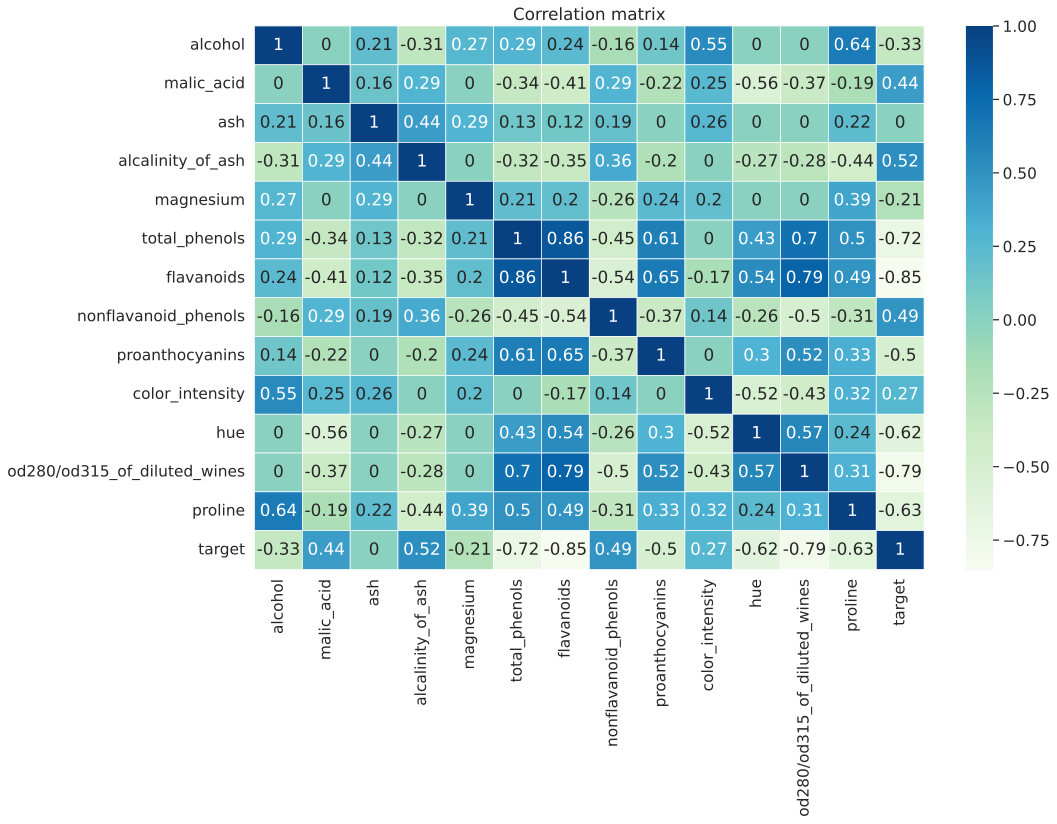

In [79]:
import seaborn as sns

plt.figure(figsize = (15,10))

sns.set(font_scale=1.4)

wine_X_corr = np.round(wine_X_corr, 2) # округляем значения
wine_X_corr[np.abs(wine_X_corr) < 0.1] = 0 # если модуль значения меньше 0.1 - ставим что корреляции нет (0)

sns.heatmap(wine_X_corr, annot=True, linewidths=.7,  cmap='GnBu')

plt.title('Correlation matrix')
plt.show()

In [80]:
#9). Создайте список high_corr из признаков, корреляция которых с полем target по абсолютному значению превышает 0.5 (причем, само поле target не должно входить в этот список).
target_corr = wine_X_corr.loc[:, 'target'].drop('target')
high_corr = [i for i in target_corr.index if abs(target_corr[i])>0.5]

In [81]:
high_corr

['alcalinity_of_ash',
 'total_phenols',
 'flavanoids',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [82]:
#10). Удалите из датафрейма X поле с целевой переменной. 
#Для всех признаков, названия которых содержатся в списке high_corr, вычислите квадрат их значений 
#и добавьте в датафрейм X соответствующие поля с суффиксом '_2', добавленного к первоначальному названию признака. 
#Итоговый датафрейм должен содержать все поля, которые, были в нем изначально, а также поля с признаками из списка high_corr, возведенными в квадрат. 
#Выведите описание полей датафрейма X с помощью метода describe.
#wine_X = wine_X.drop(['target'], axis=1)
for name in wine_X.columns:
  if name in high_corr:
    wine_X[f'{name}^2'] = wine_X[f'{name}']**2
#wine_X.head()
wine_X.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,alcalinity_of_ash^2,total_phenols^2,flavanoids^2,hue^2,od280/od315_of_diluted_wines^2,proline^2
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,1.780000e+02
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202,391.142865,5.657030,5.110049,0.968661,7.322155,6.564591e+05
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035,133.671775,2.936294,4.211441,0.443798,3.584316,5.558591e+05
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000,112.360000,0.960400,0.115600,0.230400,1.612900,7.728400e+04
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000,295.840000,3.036325,1.452100,0.612325,3.754075,2.505010e+05
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000,380.250000,5.546050,4.558250,0.931250,7.728400,4.536045e+05
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000,462.250000,7.840000,8.265700,1.254400,10.048900,9.702250e+05
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000,900.000000,15.054400,25.806400,2.924100,16.000000,2.822400e+06
